# |Titanic Survival Project|Intern Name - Sudhanshu Kumar Singh|DS2306| Submission Date 24-09-2023|

In [36]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#importing and read the data 
data=pd.read_csv("D:/sks/Flip_Robo_techonology _project/Project_discussion/titanic_train.csv")

In [38]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
data.shape

(891, 12)

In [41]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
# Fill missing values in 'Age' with the mean
data['Age'].fillna(data['Age'].mean(), inplace=True)

# Fill missing values in 'Embarked' with the most frequent value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [87]:
#seperate the data into numeric and categorical
df_num = data[['Age','SibSp','Parch','Fare']]
df_cat = data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

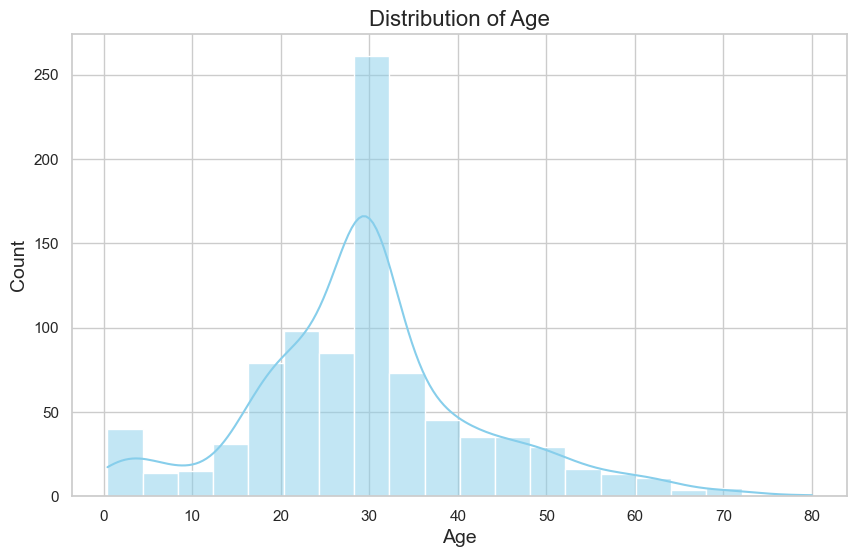

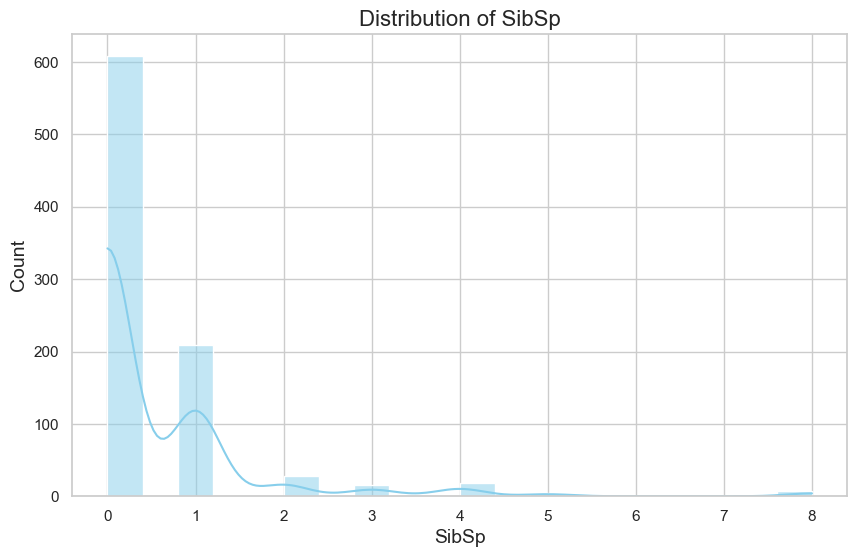

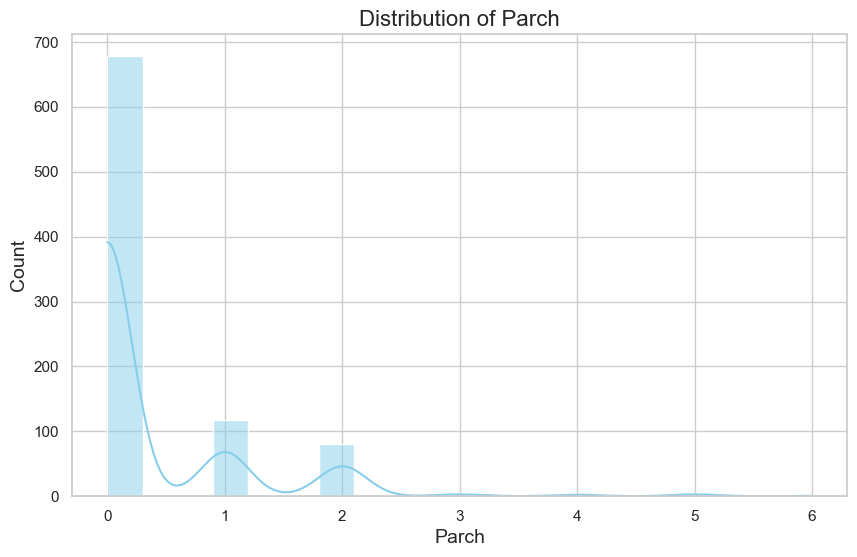

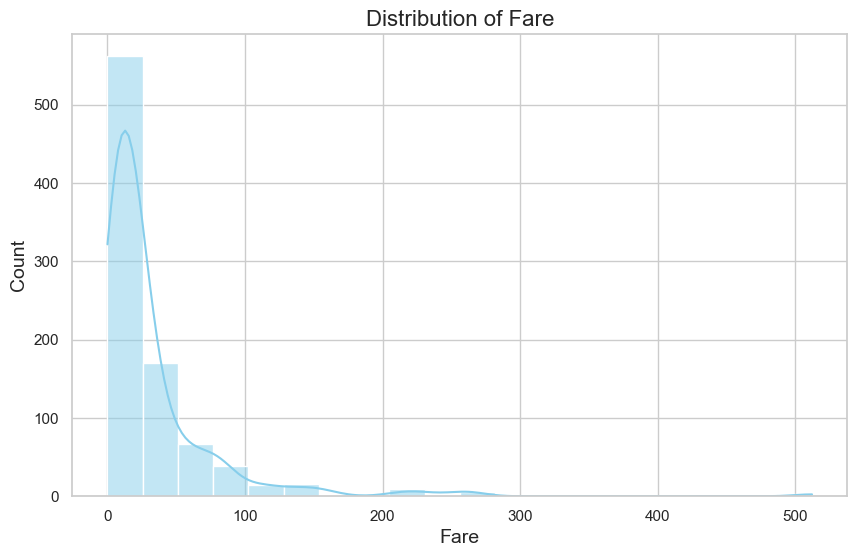

In [146]:
#Lets hist plot of numbric data set 
#Setting a stylish theame 
sns.set(style="whitegrid")
for i in df_num.columns:
    # create a histogram 
    plt.figure(figsize=(10,6)) # putting the size 
    sns.histplot(df_num[i], kde=True, color='skyblue',bins=20)
    #Labels and titles 
    plt.xlabel(i,fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.title(f"Distribution of {i}", fontsize=16)
    
    plt.show()

data.columns

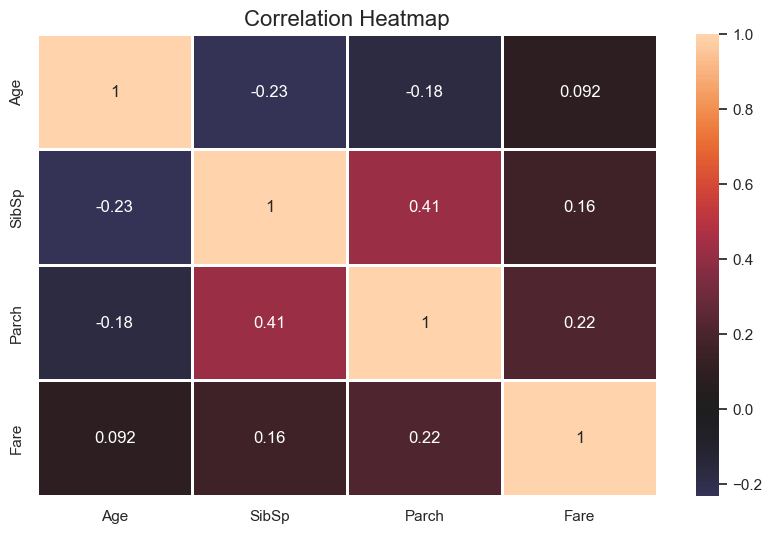

In [148]:
#Ploting  a correlation heatmap between the numeric columns
#Setting stylish theme -
sns.set_style("whitegrid")
#Creating heat map
plt.figure(figsize=(10,6))
heatmap=sns.heatmap(df_num.corr(), annot=True, linewidths=1,center=0)
#add title 
plt.title("Correlation Heatmap", fontsize=16)

plt.show()

#Parch and SibSp has a higher correlation, which generally makes sense since Parents are more likely to travel with their multiple kids and spouses tend to travel together

In [90]:
#comparing  survival rates across the numeric variables
pd.pivot_table(data, index ='Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.415100,22.117887,0.329690,0.553734
1,28.549778,48.395408,0.464912,0.473684


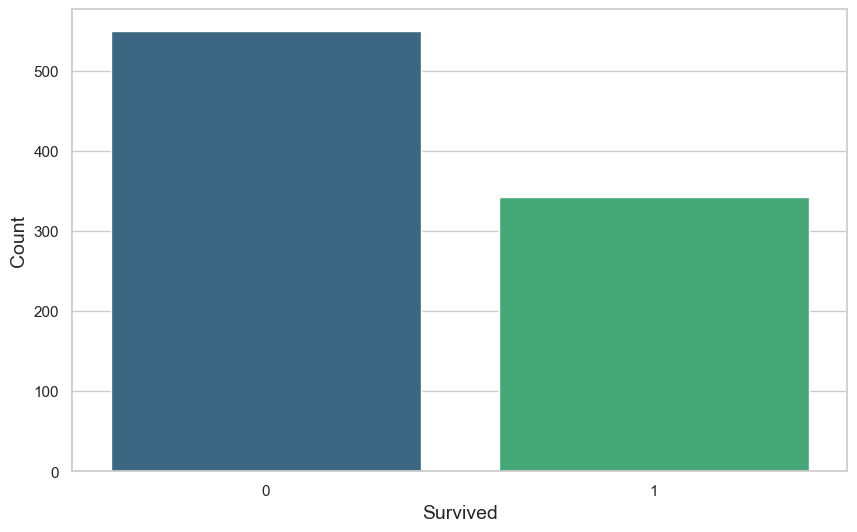

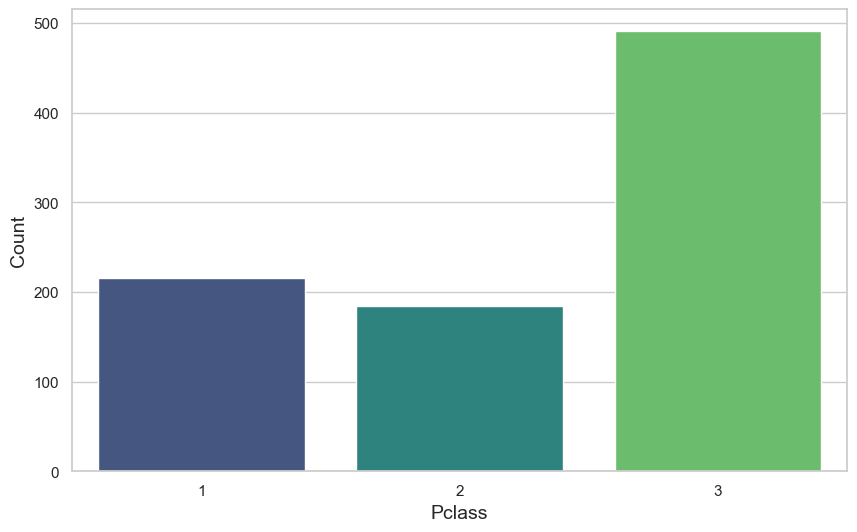

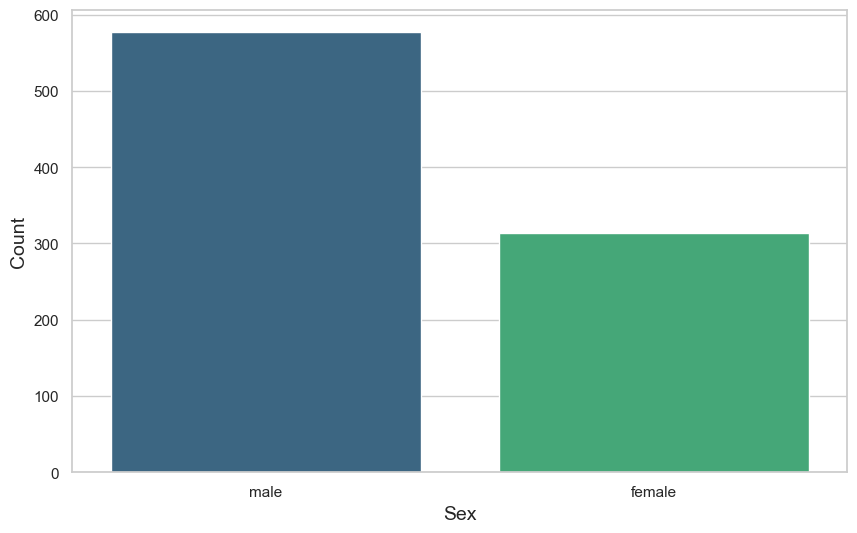

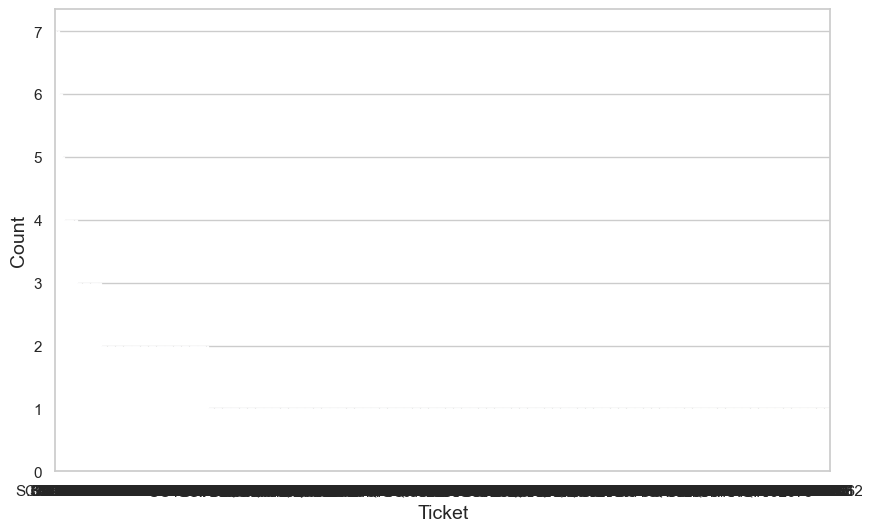

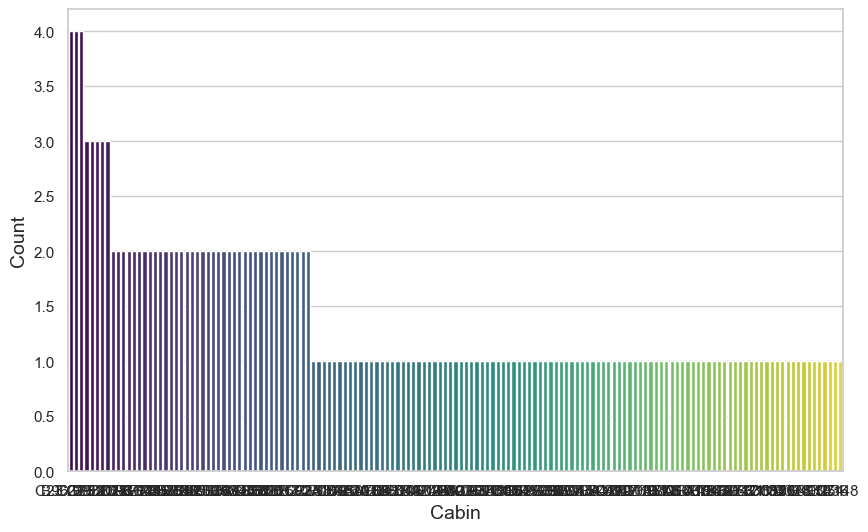

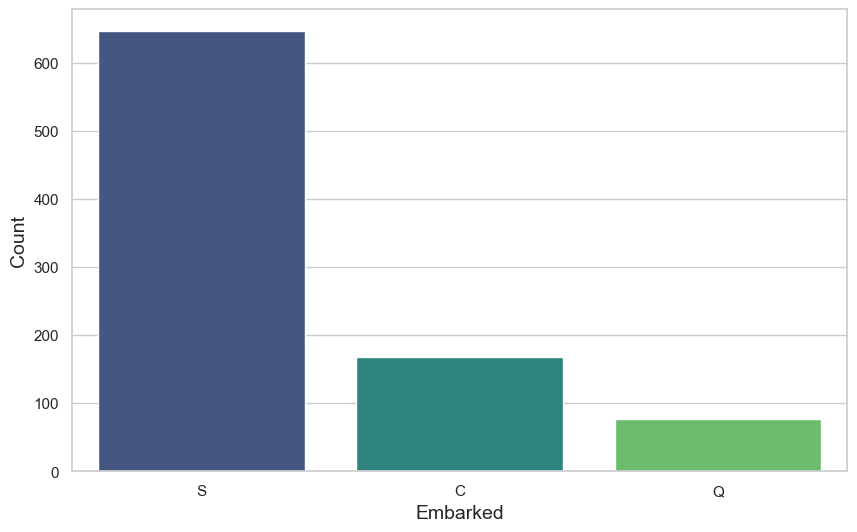

In [131]:
# Now ploting the chategorical varibale with the help of barplot 
#setting the stylish seaborn theme 
sns.set(style="whitegrid")
for i in df_cat.columns:
    plt.figure(figsize=(10,6)) #fiture size
    ax = sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts(), palette="viridis")
#adding lable and title 
    ax.set_xlabel(i, fontsize=14)
    ax.set_ylabel("Count",fontsize=14)
    plt.show()

In [92]:
#Comparibale cogegorical varible against our dependent varible 
print(pd.pivot_table(data, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219


In [93]:
#pip install scikit-learn

In [101]:
#Importing impornat liberary for ml 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [102]:
#Split the data into features (X) and the target variable (y)
# Features
X = data.drop(['Survived','Name','Sex','Ticket','Cabin','Embarked'], axis=1) 
#Target Variable 
y = data['Survived']


In [103]:
## Split the data into training and testing sets - i.e 80% training and 20 % testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# Logistic Regression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
log_reg_predictions = log_reg_model.predict(X_test)

# Evaluate Logistic Regression
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
log_reg_classification_report = classification_report(y_test, log_reg_predictions)

print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Logistic Regression Classification Report:\n", log_reg_classification_report)

Logistic Regression Accuracy: 0.7318435754189944
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80       105
           1       0.77      0.50      0.61        74

    accuracy                           0.73       179
   macro avg       0.74      0.70      0.70       179
weighted avg       0.74      0.73      0.72       179



The Logistic Regression model achieved an accuracy of approximately 73.2%.

In [121]:
# K Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Evaluate KNN
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_classification_report = classification_report(y_test, knn_predictions)

print("K Nearest Neighbors (KNN) Accuracy:", knn_accuracy)
print("K Nearest Neighbors (KNN) Classification Report:\n", knn_classification_report)

K Nearest Neighbors (KNN) Accuracy: 0.659217877094972
K Nearest Neighbors (KNN) Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.85      0.74       105
           1       0.64      0.39      0.49        74

    accuracy                           0.66       179
   macro avg       0.65      0.62      0.62       179
weighted avg       0.66      0.66      0.64       179



C:\Users\Sudhanshu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy 65.9  indicates that the KNN(K Nearest Neighbours) model predicted survial of pessangers about 65.9%.

In [122]:
# Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)

# Evaluate SVC
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_classification_report = classification_report(y_test, svc_predictions)

print("Support Vector Classifier (SVC) Accuracy:", svc_accuracy)
print("Support Vector Classifier (SVC) Classification Report:\n", svc_classification_report)

Support Vector Classifier (SVC) Accuracy: 0.5977653631284916
Support Vector Classifier (SVC) Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.98      0.74       105
           1       0.67      0.05      0.10        74

    accuracy                           0.60       179
   macro avg       0.63      0.52      0.42       179
weighted avg       0.62      0.60      0.48       179



In [ ]:
Accuracy 59.8 indicates that the svc(Support Vector Classifier) model predicted survial of pessangers about 59.8 %.

Summary - 
Logistic Regression: Best at guessing who survived and who didn't. Good balance.
K Nearest Neighbors (KNN): Okay at guessing who didn't survive, but not great at survival guesses.
Support Vector Classifier (SVC): Good at guessing who didn't survive, but not so good at survival guesses.